In [ ]:
import kagglehub
imakash3011_customer_personality_analysis_path = kagglehub.dataset_download('imakash3011/customer-personality-analysis')

print('Data source import complete.')

Data source import complete.


In [ ]:
import pandas as pd
import os

# Find the CSV file path
file_path = None
for root, dirs, files in os.walk(imakash3011_customer_personality_analysis_path):
    for file in files:
        if file.endswith('.csv') or file.endswith('.txt'):
            file_path = os.path.join(root, file)
            break
    if file_path:
        break

df = pd.read_csv(file_path, sep='\t')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# EDA (Before Pre-Processing)

In [ ]:
# Basic info - 2240 rows of data with 3 categorical features (Education, Marital_Status, Dt_Customer)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# There is missing data in income
df.isnull().sum()

,0
ID,0
Year_Birth,0
Education,0
Marital_Status,0
Income,24
Kidhome,0
Teenhome,0
Dt_Customer,0
Recency,0
MntWines,0


In [ ]:
# Explore categorical features
for col in df.select_dtypes(include=['object']):
    print(f"\n--- {col} ---")
    print(df[col].value_counts())


--- Education ---
Education
Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: count, dtype: int64

--- Marital_Status ---
Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

--- Dt_Customer ---
Dt_Customer
31-08-2012    12
12-05-2014    11
14-02-2013    11
12-09-2012    11
22-05-2014    10
              ..
01-11-2013     1
10-08-2013     1
11-10-2012     1
20-12-2012     1
09-01-2014     1
Name: count, Length: 663, dtype: int64


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

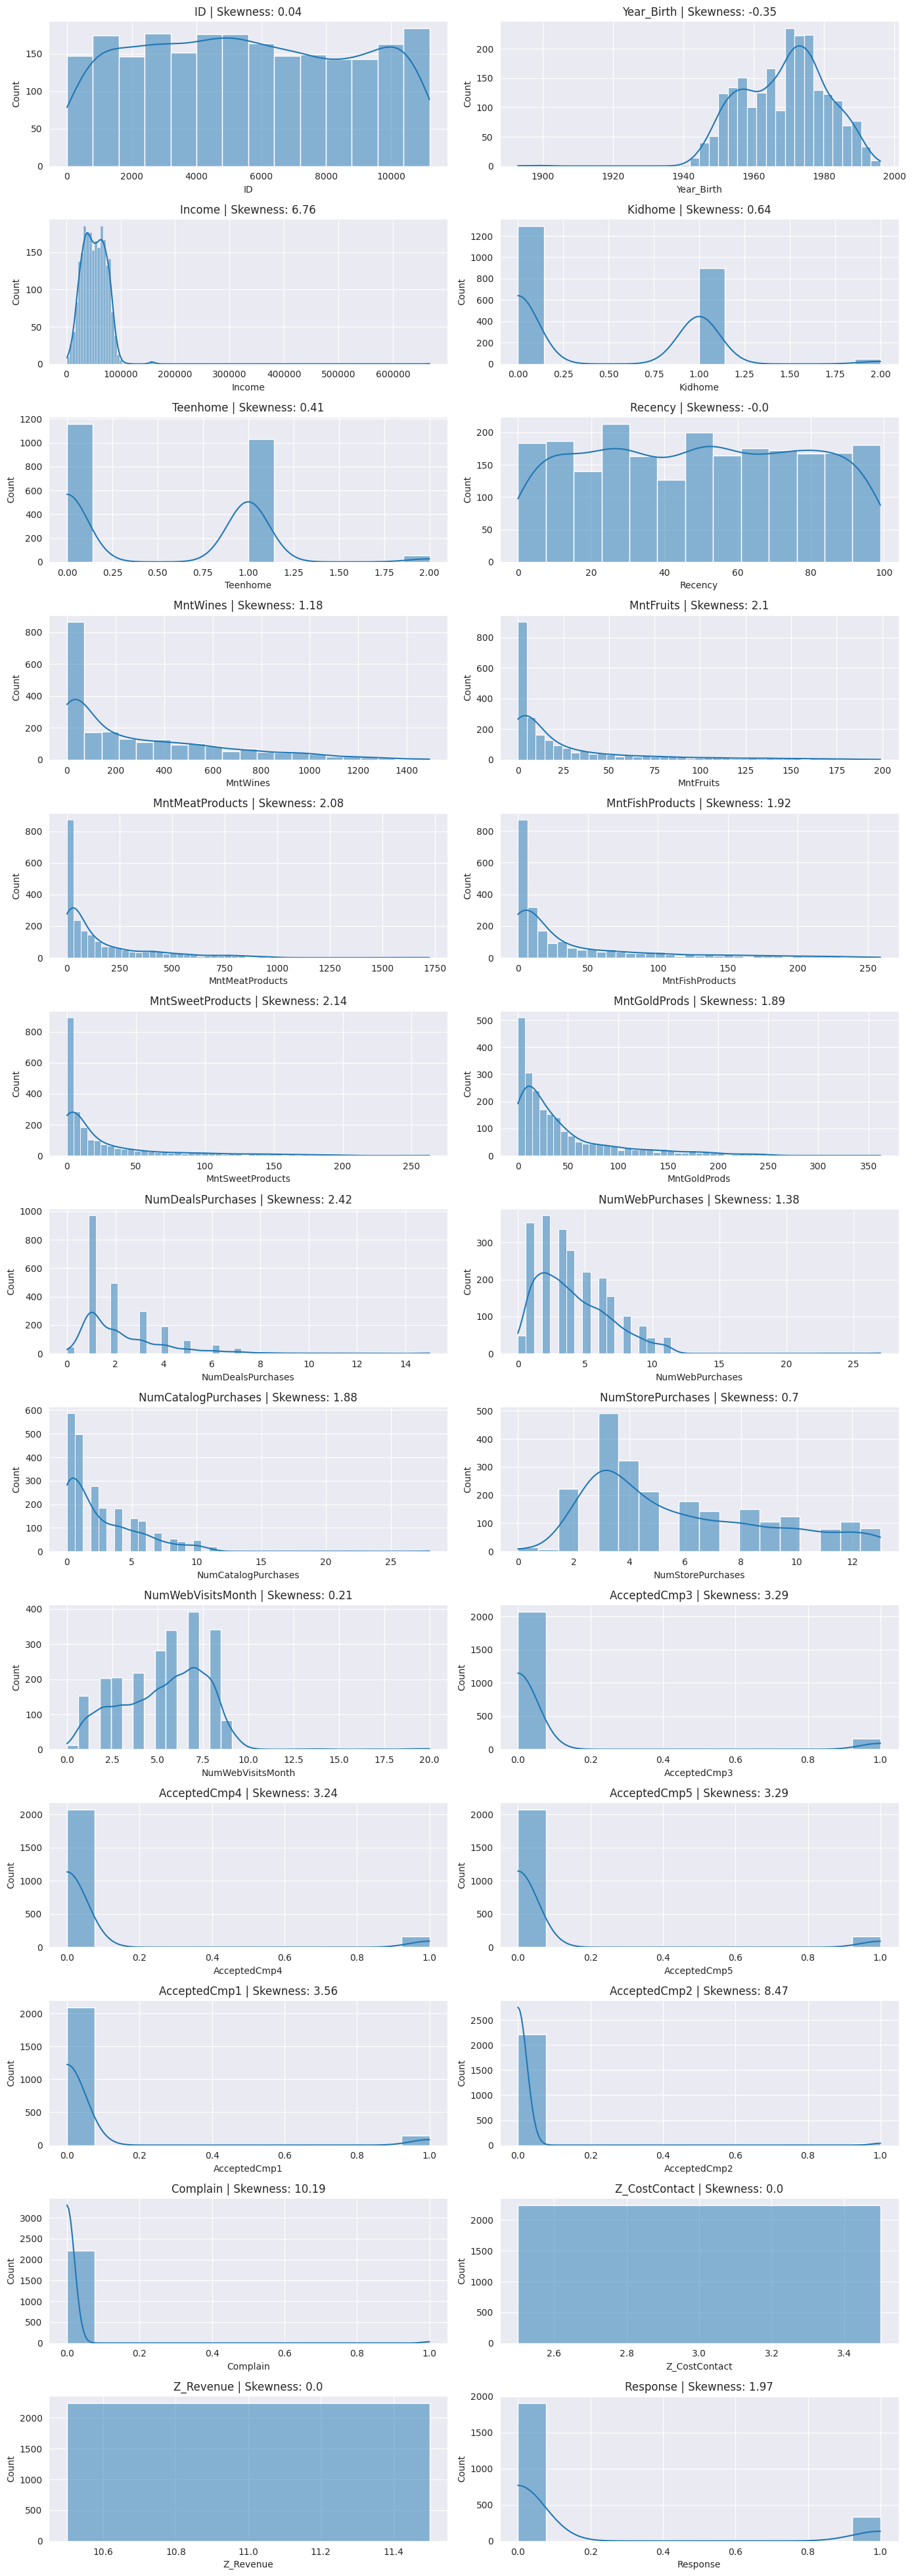

In [ ]:
# Data distribution - will need to scale the features because some of them are highly skewed
sns.set_style("darkgrid")

numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.histplot(df[feature], kde=True)
    plt.title(f"{feature} | Skewness: {round(df[feature].skew(), 2)}")

plt.tight_layout()
plt.show()

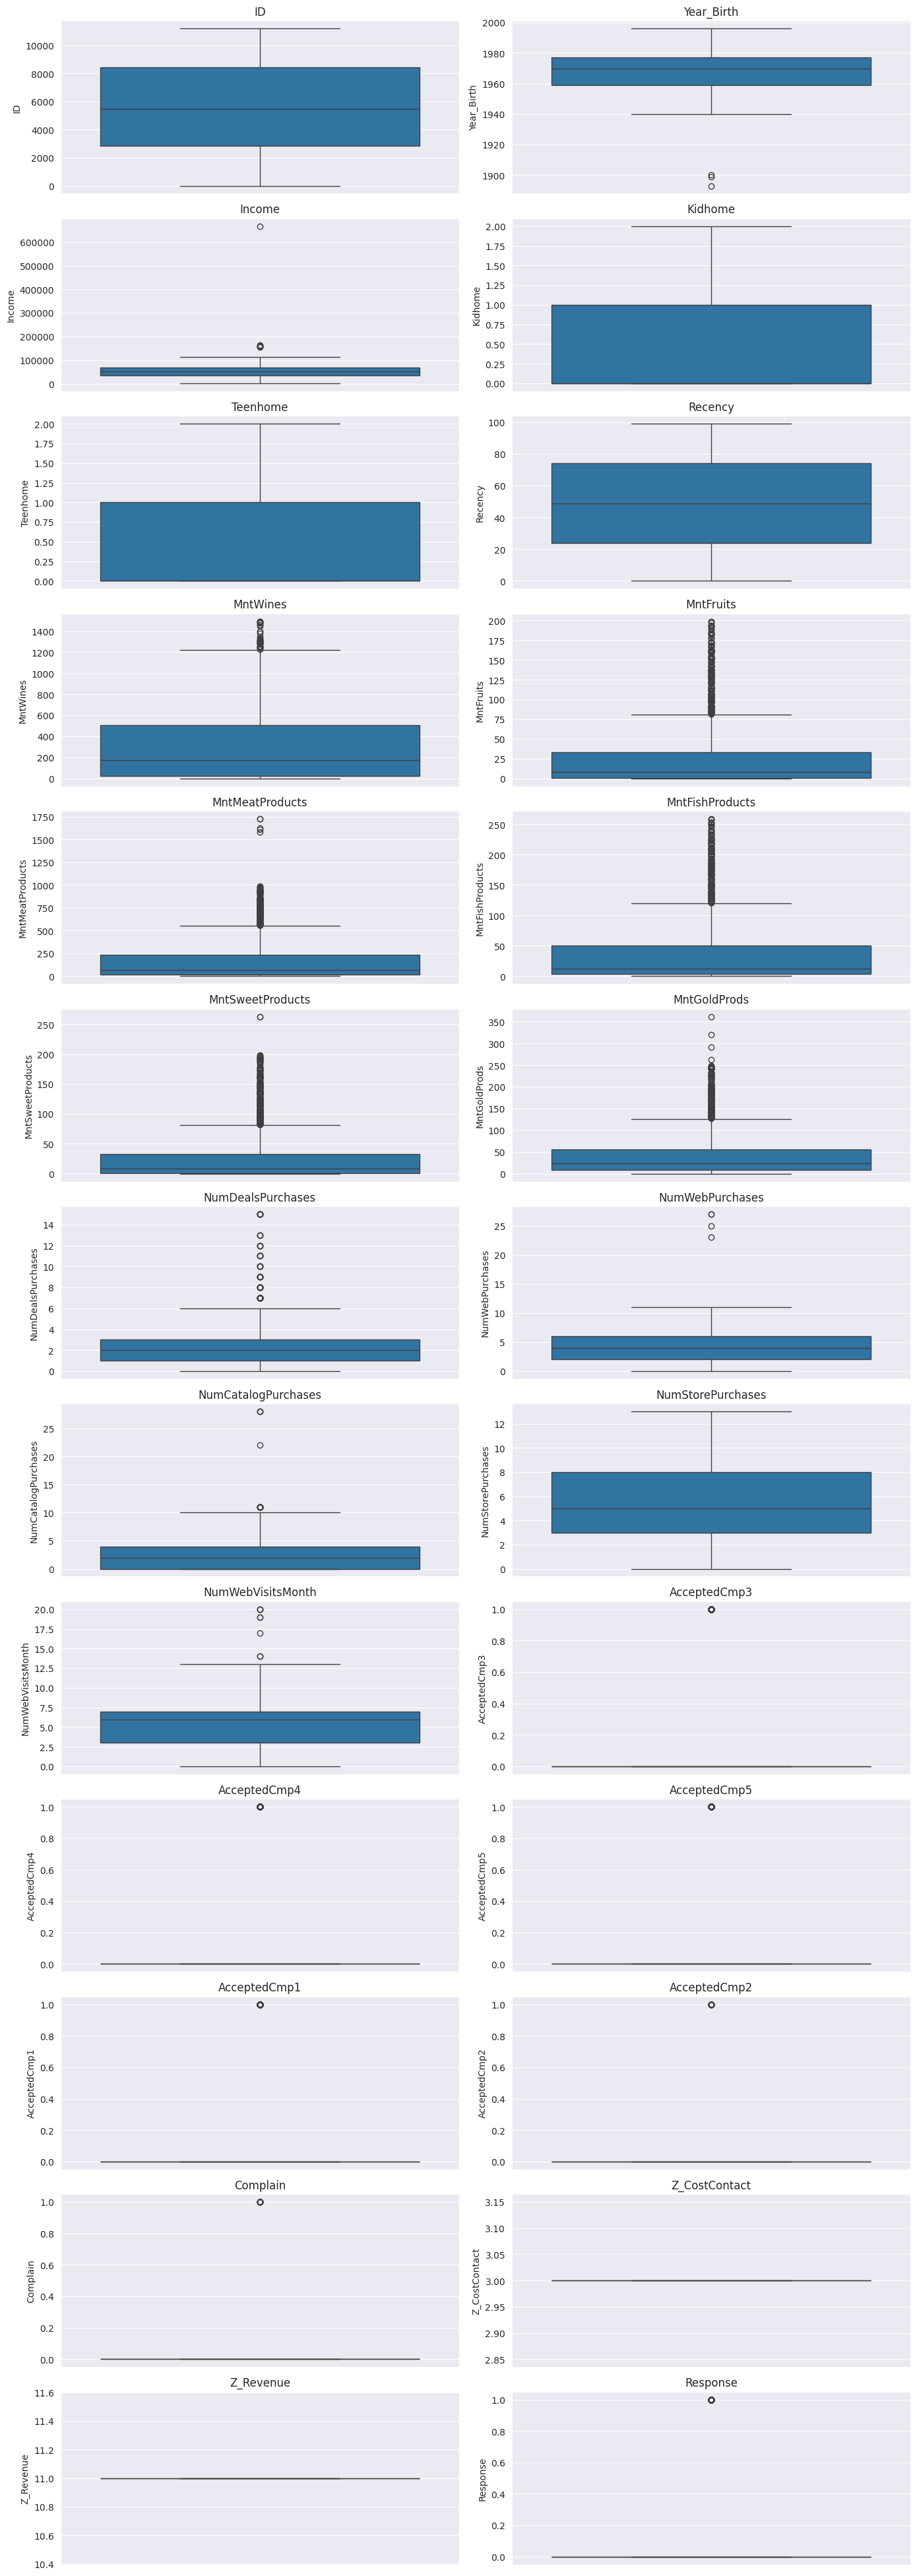

In [ ]:
# Income and all the 'products purchases' have outliers
plt.figure(figsize=(14, len(numerical_columns) * 3))
for idx, feature in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 2, idx)
    sns.boxplot(y=df[feature])
    plt.title(f"{feature}")

plt.tight_layout()
plt.show()


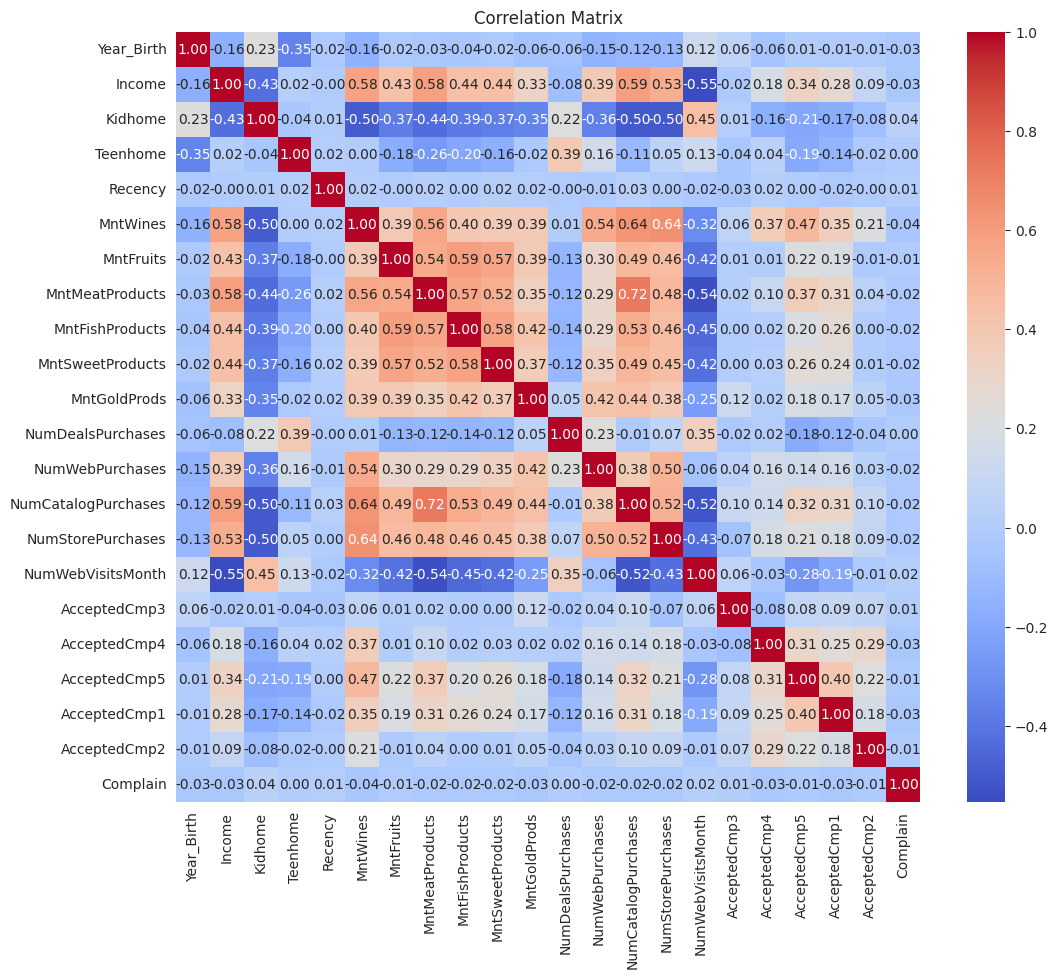

In [ ]:
# Correlation matrix for numerical features
correlation_matrix = df.drop(columns=['ID','Response','Z_CostContact','Z_Revenue']).select_dtypes(include=["int64", "float64"]).corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
sns.pairplot(df.select_dtypes(include=["int64", "float64"]))
plt.show()

Output hidden; open in https://colab.research.google.com to view.

# PreProcessing, Cleaning, Feature Selection, Feature Engineering

In [ ]:
import numpy as np

### Missing Values

In [ ]:
# Data Types and potential type conversions
print("\nData Types:")
df.info()



Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240

In [ ]:
# Missing Values
# Main issue is with income - we will imput these
print("\nMissing Values per column:")
print(df.isnull().sum())


Missing Values per column:
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64


In [ ]:
# handle missing values for income, impute using median income
median_income = df['Income'].median()
df['Income'] = df['Income'].fillna(median_income)

#### Missing Value Insights:

* The dataset is quite clean to begin with. We are only missing values from the Income feature
* imputed with median

### Manage Outliers

In [ ]:
#we have also discovered outliers in income, some people with very large incomes

#Manage Outliers in income with winsoring
#winsoring caps the outliers that are above a certain level, in this case weve chose the 99th percentile, and sets them to the 99th percentile
income_99th = df['Income'].quantile(0.99)
df['Income'] = np.where(df['Income'] > income_99th, income_99th, df['Income'])

In [ ]:
print(income_99th)

94437.68000000001


#### Managing Outliers Insights:

* We only found outliers in the income category - customers making much higher incomes than others
* We have used a winsoring method to handle outliers above the 99th percentile in income, such that their income is set at the 99th percentile
* we will continue to explore this to determine if we may want to treat customers above the 99th percentile differently, perhaps recommend an entiring different marketing strategy/campaign to those customers, high networth individuals

### Feature Engineering

In [ ]:
#creating new features based on current features
df['TotalSpending'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df['Age'] = 2025 - df['Year_Birth']
df['FamilySize_est'] = 1 + df['Kidhome'] + df['Teenhome']
df['Spending_Age_Interaction'] = df['TotalSpending'] * df['Age']
df['Income_FamilySize_Interaction'] = df['Income'] * df['FamilySize_est']
df['Income_FamilySize_Ratio'] = df['Income'] / df['FamilySize_est']

In [ ]:
#Convert 'Dt_Customer' to datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [ ]:
#Categorical variable conversion / one-hot
education_dummies = pd.get_dummies(df['Education'], prefix='Education', drop_first=True)
marital_status_dummies = pd.get_dummies(df['Marital_Status'], prefix='Marital_Status', drop_first=True)
df = pd.concat([df, education_dummies, marital_status_dummies], axis=1)


In [ ]:
#check all columns are converted to numeric
numerical_cols = ['Income', 'TotalSpending', 'Age', 'FamilySize_est', 'Spending_Age_Interaction', 'Income_FamilySize_Interaction']
for col in numerical_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_wrangled = df

In [ ]:
display(df_wrangled.head())
display(df_wrangled.info())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,True,False,False,False,False,False,True,False,False,False
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,True,False,False,False,False,False,True,False,False,False
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,True,False,False,False,False,False,False,True,False,False
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,True,False,False,False,False,False,False,True,False,False
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,False,False,True,False,False,True,False,False,False,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   ID                             2240 non-null   int64         
 1   Year_Birth                     2240 non-null   int64         
 2   Education                      2240 non-null   object        
 3   Marital_Status                 2240 non-null   object        
 4   Income                         2240 non-null   float64       
 5   Kidhome                        2240 non-null   int64         
 6   Teenhome                       2240 non-null   int64         
 7   Dt_Customer                    2240 non-null   datetime64[ns]
 8   Recency                        2240 non-null   int64         
 9   MntWines                       2240 non-null   int64         
 10  MntFruits                      2240 non-null   int64         
 11  MntMeatProducts  

None

#### Feature Engineering Insights:

* Again, the dataset to begin with is fairly clean, so our feature engineering a this point is farily simple
* We have started with a few obvious engineered features. We may continue to explore more complex interactions between features
* Few categorical features, dummy variable creation was limited to education and marital status features
* We will explore additonal feature engineering of the Maritial Status column for the categories 'Alone', 'Absurd', 'YOLO', but there are less than 10, so we may drop them or reclassify them

### Data Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler

#Utilizing a standard scaler to scale features

#selected based on value ranges
numerical_features_to_scale = ['Income', 'TotalSpending', 'Age', 'FamilySize_est', 'Spending_Age_Interaction', 'Income_FamilySize_Interaction', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

#Initialize standard scaler and  Fit transform the selected numerical features
scaler = StandardScaler()
df_wrangled[numerical_features_to_scale] = scaler.fit_transform(df_wrangled[numerical_features_to_scale])




In [ ]:
# df_scaled will be used for segmentation analysis and ML modeling
df_scaled = df_wrangled

display(df_scaled.head())

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Together,Marital_Status_Widow,Marital_Status_YOLO
0,5524,1957,Graduation,Single,0.309355,0,0,2012-09-04,0.307039,0.983781,...,True,False,False,False,False,False,True,False,False,False
1,2174,1954,Graduation,Single,-0.261949,1,1,2014-03-08,-0.383664,-0.870479,...,True,False,False,False,False,False,True,False,False,False
2,4141,1965,Graduation,Together,0.962086,0,0,2013-08-21,-0.798086,0.362723,...,True,False,False,False,False,False,False,True,False,False
3,6182,1984,Graduation,Together,-1.216124,1,0,2014-02-10,-0.798086,-0.870479,...,True,False,False,False,False,False,False,True,False,False
4,5324,1981,PhD,Married,0.316863,1,0,2014-01-19,1.550305,-0.389085,...,False,False,True,False,False,True,False,False,False,False


# Initial Data Clustering Exploration



In [ ]:
#Split the data

from sklearn.model_selection import train_test_split

# We're using They're most recent response to a campaign as the target variable initially,
# consider chaning this, updating, engineering a different feature, etc

# Define features (X) and target variable (y)
X = df_scaled.drop('Response', axis=1)
y = df_scaled['Response']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1792, 45) (448, 45) (1792,) (448,)


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Drop non-numeric columns for KMeans
X_train_numeric = X_train.select_dtypes(include=np.number)
X_test_numeric = X_test.select_dtypes(include=np.number)

# Initialize KMeans model
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)

# Fit the model to the training data
kmeans.fit(X_train_numeric)

# Predict cluster labels for training and testing data
X_train['cluster_label'] = kmeans.labels_
X_test['cluster_label'] = kmeans.predict(X_test_numeric)

# Evaluate the clustering performance
silhouette_avg = silhouette_score(X_train_numeric, X_train['cluster_label'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.5260470774011556


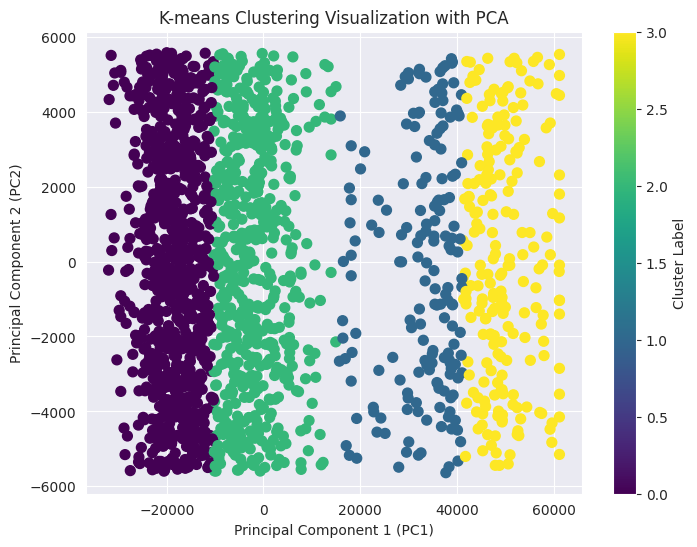

In [ ]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming X_train_numeric and kmeans are already defined as in your previous code

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
X_train_pca = pca.fit_transform(X_train_numeric)

# Create a DataFrame for plotting
df_pca = pd.DataFrame(data=X_train_pca, columns=['PC1', 'PC2'])
df_pca['cluster_label'] = kmeans.labels_

# Visualize the clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_pca['PC1'], df_pca['PC2'], c=df_pca['cluster_label'], cmap='viridis', s=50)
plt.title('K-means Clustering Visualization with PCA')
plt.xlabel('Principal Component 1 (PC1)')
plt.ylabel('Principal Component 2 (PC2)')
plt.colorbar(label='Cluster Label')
plt.show()

In [ ]:
# Assuming pca is already defined as in the previous code

# Get the feature loadings for PC1 and PC2
loadings = pca.components_

# Create a DataFrame for better visualization
feature_loadings = pd.DataFrame(loadings, columns=X_train_numeric.columns, index=['PC1', 'PC2'])

# Display the feature loadings
print(feature_loadings)

           ID  Year_Birth    Income   Kidhome      Teenhome       Recency  \
PC1  0.000491   -0.000047  0.000033 -0.000014 -9.076655e-06  1.895036e-08   
PC2  1.000000    0.000021  0.000001  0.000003 -4.004313e-07 -1.510829e-05   

     MntWines  MntFruits  MntMeatProducts  MntFishProducts  ...  AcceptedCmp2  \
PC1  0.000025   0.000024     3.106832e-05         0.000025  ...  6.076020e-07   
PC2 -0.000011   0.000005    -3.191627e-07        -0.000007  ... -5.507421e-07   

         Complain  Z_CostContact     Z_Revenue  TotalSpending       Age  \
PC1 -1.266015e-07   1.720370e-29 -1.994274e-28       0.000032  0.000004   
PC2  1.117374e-06  -5.765362e-28  2.567682e-27      -0.000007 -0.000002   

     FamilySize_est  Spending_Age_Interaction  Income_FamilySize_Interaction  \
PC1       -0.000030                  0.000030                      -0.000003   
PC2        0.000004                 -0.000005                       0.000002   

     Income_FamilySize_Ratio  
PC1                 1.0000

#### Initial Clustering Insights:

* Silhouette score for the K-means clustering with 4 clusters is 0.572. This is a reasonably good score, suggesting that the clustering is fairly well-defined and the clusters are relatively separated. However, there might still be room for improvement by exploring different numbers of clusters or alternative clustering algorithms.

# Next Steps for Final Deliverable

**Final Deliverables (May 2)**

3. Clustering Modeling - April 21

  - Try K-Means

  - Use PCA or t-SNE for visualization.

  - Choose optimal clusters using silhouette or elbow method.
  
  - Evaluate model

4. Cluster Profiling - April 24

  - Analyze cluster composition: income, age, product preference.

  - Interpret clusters.

5. Business Insights - May 1

  - Recommend campaign strategies for each segment.

  - Finalize report with segment summaries and visualizations.
  

## TA Feedback


* Scale and imppute after test/train split
* consider standard scale for normalized features, else something else
* try multiple types of clustering and examine results
* try a few different types of models to make it more robust